In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


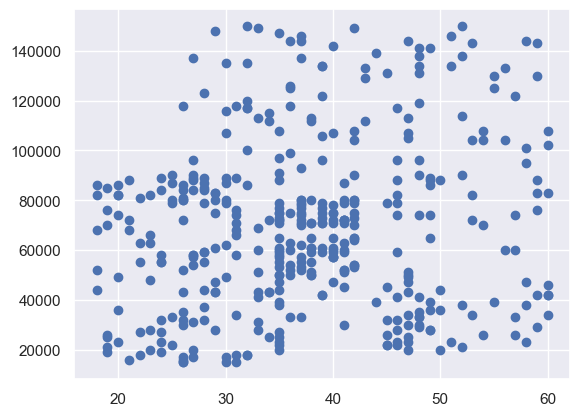

In [6]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.show()

In [7]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [8]:
# split the data into training and test for building the model and validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 50ms/step - loss: 2479.7075 - accuracy: 0.6531 - val_loss: 46.3254 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 737.4580 - accuracy: 0.3906 - val_loss: 137.1909 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 352.6119 - accuracy: 0.6281 - val_loss: 73.5010 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 190.0843 - accuracy: 0.5031 - val_loss: 193.8735 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 98.5893 - accuracy: 0.5406 - val_loss: 63.0404 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 54.0545 - accuracy: 0.5781 - val_loss: 123.3927 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 107.3216 - accuracy: 0.4156 - val_loss: 124.8411 - val

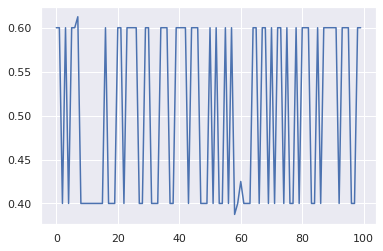

In [14]:
plt.plot(history.history['val_accuracy'])

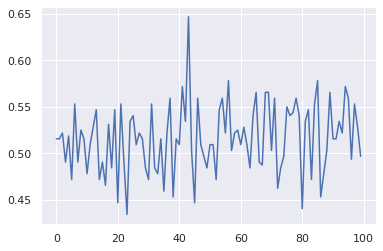

In [15]:
plt.plot(history.history['accuracy'])

# Feature Scaling 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

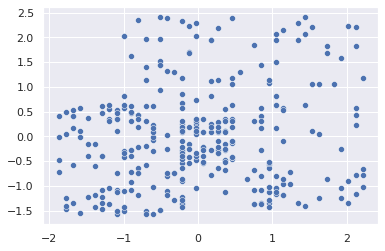

In [19]:
sns.scatterplot(x_train_scaled[:,0], x_train_scaled[:,1])
plt.show()

In [23]:
# from tensorflow.keras.layers import Dropout

In [30]:
model1 = Sequential()
model1.add(Dense(128, activation = 'relu', input_dim=2))
# model1.add(Dropout(0.1))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.6186 - accuracy: 0.7594 - val_loss: 0.5838 - val_accuracy: 0.8500
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.8094 - val_loss: 0.5382 - val_accuracy: 0.8500
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5255 - accuracy: 0.8344 - val_loss: 0.5002 - val_accuracy: 0.8375
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4896 - accuracy: 0.8531 - val_loss: 0.4691 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4575 - accuracy: 0.8438 - val_loss: 0.4440 - val_accuracy: 0.8250
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4273 - accuracy: 0.8562 - val_loss: 0.4236 - val_accuracy: 0.8250
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4057 - accuracy: 0.8438 - val_loss: 0.4056 - val_accuracy: 0.8125
Epoch 8/100


In [ ]:
# accuracy: 0.9250 - val_loss: 0.3740 - val_accuracy: 0.8625

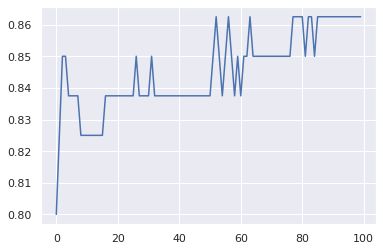

In [21]:
plt.plot(history.history['val_accuracy'])

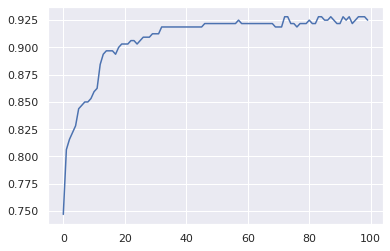

In [22]:
plt.plot(history.history['accuracy'])